In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, recall_score, precision_score, f1_score, matthews_corrcoef, roc_curve, auc
import seaborn as sns
from importlib import reload
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import VotingClassifier

In [26]:
#read the training data from train.csv to be x train and y train
df_training = pd.read_csv('train.csv')
x_train = df_training.drop('machine_failure', axis=1)
y_train = df_training['machine_failure']

In [27]:
df_testing = pd.read_csv('test.csv')
x_test = df_testing.drop('machine_failure', axis=1)
y_test = df_testing['machine_failure']

In [28]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11592 entries, 0 to 11591
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   torque               11592 non-null  float64
 1   tool_wear            11592 non-null  int64  
 2   air_temperature      11592 non-null  float64
 3   rotational_speed     11592 non-null  int64  
 4   process_temperature  11592 non-null  float64
 5   type_enc             11592 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 543.5 KB


In [29]:
x_train

,torque,tool_wear,air_temperature,rotational_speed,process_temperature,type_enc
0,46.5,75,298.9,1365,309.9,1
1,52.9,130,298.4,1344,308.7,0
2,36.8,78,298.9,1571,310.1,1
3,50.3,183,302.3,1433,311.8,1
4,57.2,67,302.6,1359,310.4,1
...,...,...,...,...,...,...
11587,61.3,207,297.2,1340,308.1,2
11588,39.4,203,300.5,1546,311.9,1
11589,35.5,44,298.6,1681,310.0,2
11590,51.9,153,298.2,1436,308.8,0


In [30]:
y_train

,machine_failure
0,0
1,0
2,0
3,0
4,1
...,...
11587,1
11588,0
11589,0
11590,0


In [31]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

# Model Training

In [32]:
models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Gradient Boosting', GradientBoostingClassifier()))
models.append(('XGBoost', xgb.XGBClassifier()))
models.append(('Random Forest', RandomForestClassifier()))

In [33]:
models

[('Logistic Regression', LogisticRegression()),
 ('Decision Tree', DecisionTreeClassifier()),
 ('Gradient Boosting', GradientBoostingClassifier()),
 ('XGBoost',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, random_state=None, ...)),
 ('Random Forest', RandomForestClassifier())]

Logistic Regression Confusion Matrix:
[[1715  185]
 [ 323  676]]
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1900
           1       0.79      0.68      0.73       999

    accuracy                           0.82      2899
   macro avg       0.81      0.79      0.80      2899
weighted avg       0.82      0.82      0.82      2899

Logistic Regression Accuracy: 0.824767161090031



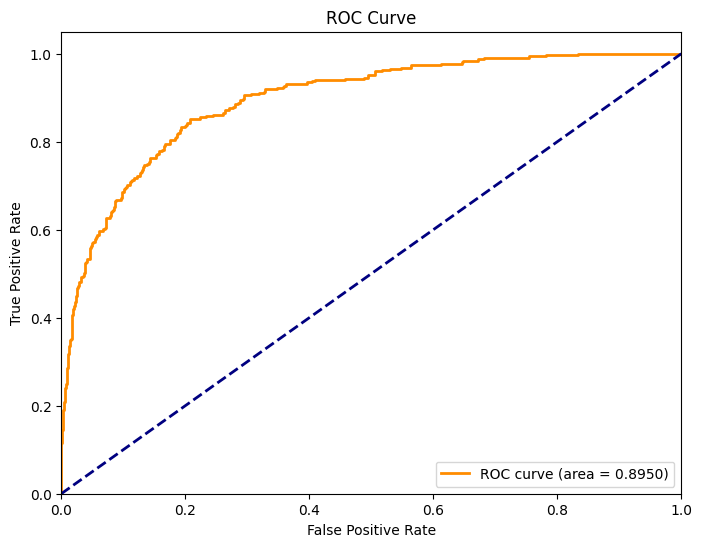

Decision Tree Confusion Matrix:
[[1869   31]
 [   0  999]]
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1900
           1       0.97      1.00      0.98       999

    accuracy                           0.99      2899
   macro avg       0.98      0.99      0.99      2899
weighted avg       0.99      0.99      0.99      2899

Decision Tree Accuracy: 0.9893066574680924



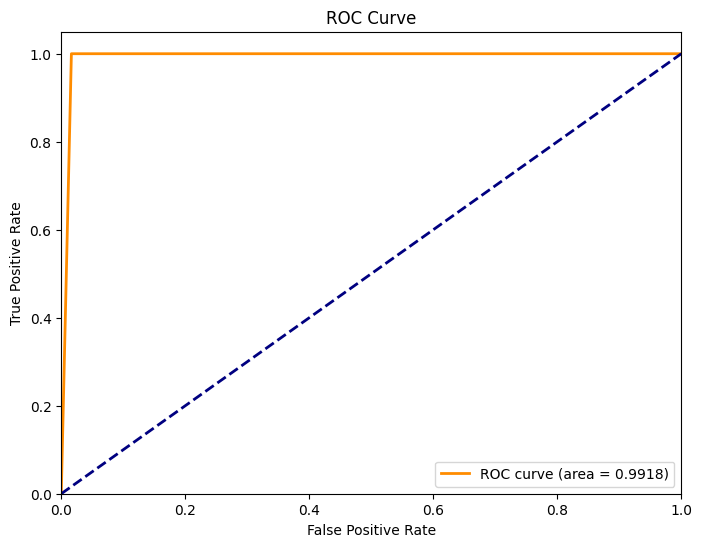

Gradient Boosting Confusion Matrix:
[[1816   84]
 [  66  933]]
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1900
           1       0.92      0.93      0.93       999

    accuracy                           0.95      2899
   macro avg       0.94      0.94      0.94      2899
weighted avg       0.95      0.95      0.95      2899

Gradient Boosting Accuracy: 0.948258020006899



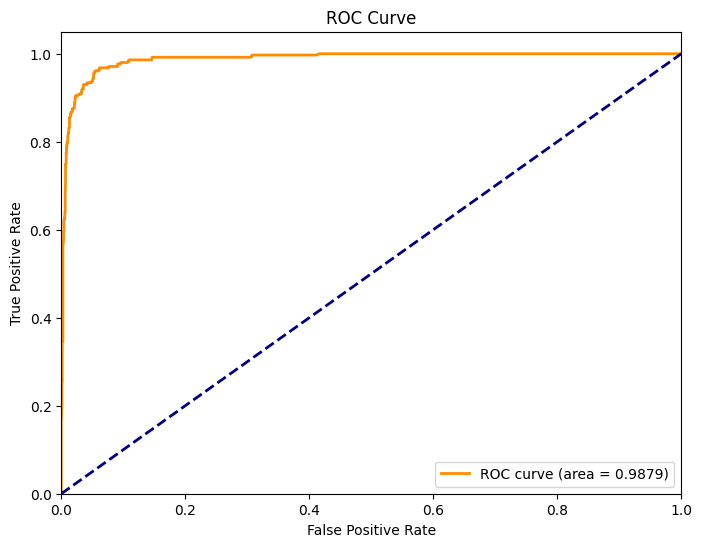

XGBoost Confusion Matrix:
[[1878   22]
 [   0  999]]
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1900
           1       0.98      1.00      0.99       999

    accuracy                           0.99      2899
   macro avg       0.99      0.99      0.99      2899
weighted avg       0.99      0.99      0.99      2899

XGBoost Accuracy: 0.9924111762676785



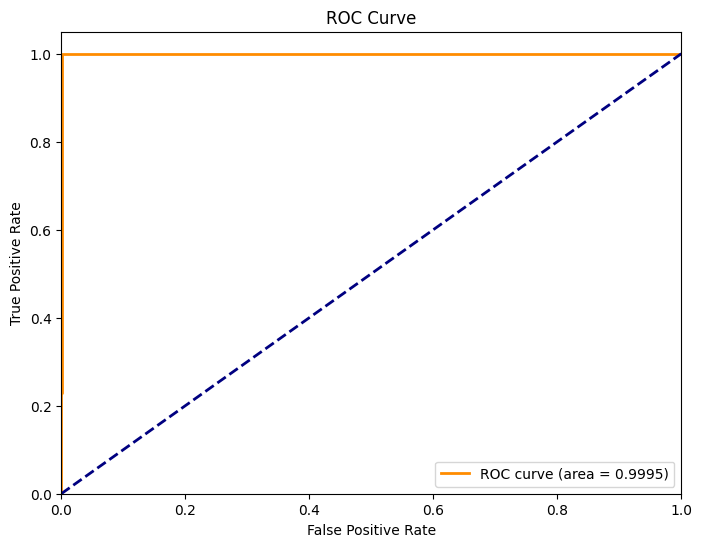

Random Forest Confusion Matrix:
[[1885   15]
 [   0  999]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1900
           1       0.99      1.00      0.99       999

    accuracy                           0.99      2899
   macro avg       0.99      1.00      0.99      2899
weighted avg       0.99      0.99      0.99      2899

Random Forest Accuracy: 0.9948258020006899



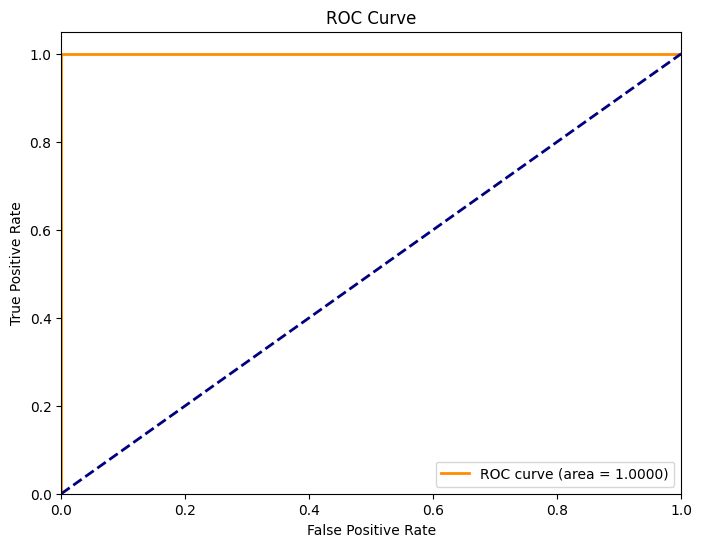

In [34]:
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    print(f"{name} Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print(f"{name} Classification Report:")
    print(classification_report(y_test, y_pred))
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy}")
    print()
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6), facecolor='white')
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.gca().set_facecolor('white')
    plt.show()

**Logistic Regression**<br>
shows reasonable performance but is outperformed by the more complex models, especially in class 1 recall.<br><br>
**Decision Tree**<br> shows very high accuracy, but it may suffer from overfitting.<br><br>
**Gradient Boosting**<br> offers a strong balance of accuracy and robustness with high precision and recall.<br><br>
**XGBoost and Random Forest**<br> provide the highest accuracy and perform almost perfectly, with excellent generalization capabilities.<br>

In [35]:
score_weights = [1,1,0.5,0.5,1]

Random Forest Confusion Matrix:
[[1883   17]
 [   0  999]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1900
           1       0.98      1.00      0.99       999

    accuracy                           0.99      2899
   macro avg       0.99      1.00      0.99      2899
weighted avg       0.99      0.99      0.99      2899

Random Forest Accuracy: 0.9941359089341152



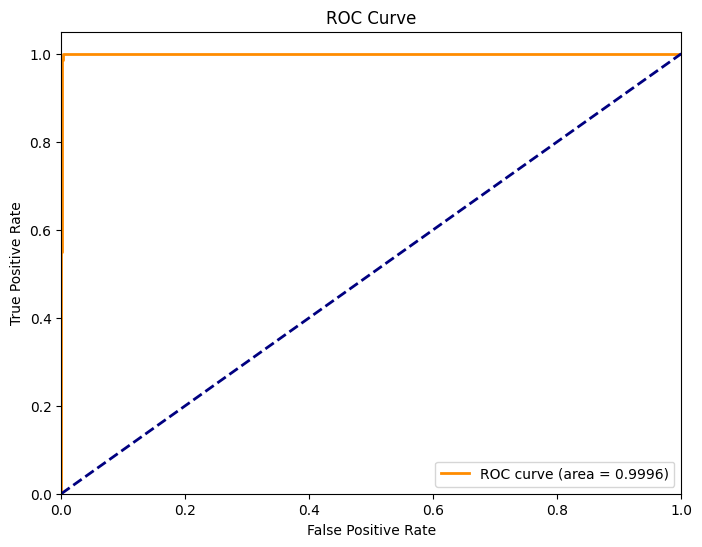

In [36]:
voting_classifier = VotingClassifier(estimators=[('xgb', xgb.XGBClassifier()), ('rf', RandomForestClassifier()),('gb',GradientBoostingClassifier()),('lr',LogisticRegression()),('dt',DecisionTreeClassifier())], voting='soft',weights=score_weights)
voting_classifier.fit(X_train, y_train)
y_pred_voting = voting_classifier.predict(X_test)
y_pred_proba_voting = voting_classifier.predict_proba(X_test)[:, 1]
print(f"{name} Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_voting))
print(f"{name} Classification Report:")
print(classification_report(y_test, y_pred_voting))
accuracy = accuracy_score(y_test, y_pred_voting)
print(f"{name} Accuracy: {accuracy}")
print()
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_voting)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6), facecolor='white')
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.gca().set_facecolor('white')
plt.show()

**The voting classifier**
<br>combines the strengths of multiple models and tries to avoid the overfitting and produces a final prediction by averaging the probability outputs of the individual classifiers.

#Trying the model on real values

In [37]:
l = voting_classifier.predict(X_train)

In [38]:
# prediction based on values
air_temprature = float(input("Enter the temprature: "))
vibration = int(input("Enter the vibration(rotational speed): "))
torque = float(input("Enter the torque: "))
tool_wear = int(input("Enter the tool wear: "))
process_temp = float(input("Enter the process temprature: "))
type_enc = int(input("Enter the type(0,1,2): "))

#torque	tool_wear	air_temperature	rotational_speed	process_temperature	type_enc

# pass these to the model
l = [[torque,tool_wear,air_temprature,vibration,process_temp,type_enc]]
l = scaler.transform(l)
prediction = voting_classifier.predict(l)
print(prediction)

KeyboardInterrupt: Interrupted by user

#Exporting The Model

In [39]:
import joblib

In [40]:
scaler_filename = 'scaler.pkl'
joblib.dump(scaler, scaler_filename)

['scaler.pkl']

In [41]:
model_filename = 'voting_classifier_model.pkl'
joblib.dump(voting_classifier, model_filename)

['voting_classifier_model.pkl']